# Regressão Logística

# Exercício:

1. Reproduzir o último exercício trocando o dataset load_digits pelo dataset MNIST. Utilize apenas as primeiras 2 mil amostras para treinamento e as próximas mil amostras para teste.

#### Importando bibliotecas

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [33]:
#download dataset
mnist = fetch_openml('mnist_784', data_home='./data')

In [34]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [35]:
# Dividindo os dados em conjunto de treino e conjunto de teste

x_train = mnist.data[:2000]
x_test = mnist.data[2000:3000] 
y_train = mnist.target[:2000]
y_test = mnist.target[2000:3000] 

In [36]:
# Normalizando os dados

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [37]:
# Criando e treinando o modelo

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [38]:
# Avaliando o modelo

x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

In [39]:
print('Acurácia sobre conjunto de treinamento = ',model.score(x_train, y_train))
print('Acurácia sobre conjunto de teste = ',model.score(x_test, y_test))

Acurácia sobre conjunto de treinamento =  0.9705
Acurácia sobre conjunto de teste =  0.87


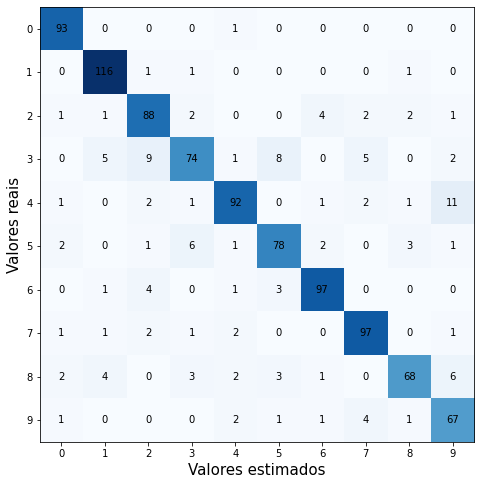

In [40]:
# plotando a matriz

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Valores estimados', fontsize=15, color='black')
ax.set_ylabel('Valores reais', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        94
           1       0.91      0.97      0.94       119
           2       0.82      0.87      0.85       101
           3       0.84      0.71      0.77       104
           4       0.90      0.83      0.86       111
           5       0.84      0.83      0.83        94
           6       0.92      0.92      0.92       106
           7       0.88      0.92      0.90       105
           8       0.89      0.76      0.82        89
           9       0.75      0.87      0.81        77

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



Material baseado em: https://realpython.com/logistic-regression-python/